In [4]:
import sympy as sp
from sympy.abc import x, y, z
from sympy import init_printing
init_printing()
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

In [6]:
Mx, My, Mz = sp.symbols('M_x M_y M_z', cls=sp.Function)
D1, D2 = sp.symbols('D_1 D_2')

def LI(i, j, k):
    """
    Symbolic representation of the Lifshitz Invariant
    
    $ L_{ij}^{(k)) $
    
    """
    Mi, Mj = sp.symbols(f'M_{str(i)} M_{str(j)}', cls=sp.Function)
    
    return Mi(x,y,z)*sp.diff(Mj(x, y, z), k) - Mj(x,y,z)*sp.diff(Mi(x,y,z), k)


def VarDeriv(w):
    Fx = sp.diff(w, Mx(x, y, z)) - sp.diff(sp.diff(w, sp.diff(Mx(x, y, z), x)), x) \
                                 - sp.diff(sp.diff(w, sp.diff(Mx(x, y, z), y)), y) \
                                 - sp.diff(sp.diff(w, sp.diff(Mx(x, y, z), z)), z)

    Fy = sp.diff(w, My(x, y, z)) - sp.diff(sp.diff(w, sp.diff(My(x, y, z), x)), x) \
                                 - sp.diff(sp.diff(w, sp.diff(My(x, y, z), y)), y) \
                                 - sp.diff(sp.diff(w, sp.diff(My(x, y, z), z)), z)

    Fz = sp.diff(w, Mz(x, y, z)) - sp.diff(sp.diff(w, sp.diff(Mz(x, y, z), x)), x) \
                                 - sp.diff(sp.diff(w, sp.diff(Mz(x, y, z), y)), y) \
                                 - sp.diff(sp.diff(w, sp.diff(Mz(x, y, z), z)), z)
    
    return sp.simplify(Fx)*N.x + sp.simplify(Fy)*N.y + sp.simplify(Fz)*N.z


def discretised_form(field):
    dl = sp.Symbol('\delta l')
    disc = sp.as_finite_diff(field, 2*dl).expand()
    xm =  sp.Add(*[argi for argi in disc.args if Mx(-dl + x, y, z) in argi.atoms(sp.Function)])
    xm += sp.Add(*[argi for argi in disc.args if My(-dl + x, y, z) in argi.atoms(sp.Function)])
    xm += sp.Add(*[argi for argi in disc.args if Mz(-dl + x, y, z) in argi.atoms(sp.Function)])
    xp =  sp.Add(*[argi for argi in disc.args if Mx(x + dl, y, z) in argi.atoms(sp.Function)])
    xp += sp.Add(*[argi for argi in disc.args if My(x + dl, y, z) in argi.atoms(sp.Function)])
    xp += sp.Add(*[argi for argi in disc.args if Mz(x + dl, y, z) in argi.atoms(sp.Function)])
    ym =  sp.Add(*[argi for argi in disc.args if Mx(x, y - dl, z) in argi.atoms(sp.Function)])
    ym += sp.Add(*[argi for argi in disc.args if My(x, y - dl, z) in argi.atoms(sp.Function)])
    ym += sp.Add(*[argi for argi in disc.args if Mz(x, y - dl, z) in argi.atoms(sp.Function)])
    yp =  sp.Add(*[argi for argi in disc.args if Mx(x, y + dl, z) in argi.atoms(sp.Function)])
    yp += sp.Add(*[argi for argi in disc.args if My(x, y + dl, z) in argi.atoms(sp.Function)])
    yp += sp.Add(*[argi for argi in disc.args if Mz(x, y + dl, z) in argi.atoms(sp.Function)])
    zm =  sp.Add(*[argi for argi in disc.args if Mx(x, y, z - dl) in argi.atoms(sp.Function)])
    zm += sp.Add(*[argi for argi in disc.args if My(x, y, z - dl) in argi.atoms(sp.Function)])
    zm += sp.Add(*[argi for argi in disc.args if Mz(x, y, z - dl) in argi.atoms(sp.Function)])
    zp =  sp.Add(*[argi for argi in disc.args if Mx(x, y, z + dl) in argi.atoms(sp.Function)])
    zp += sp.Add(*[argi for argi in disc.args if My(x, y, z + dl) in argi.atoms(sp.Function)])
    zp += sp.Add(*[argi for argi in disc.args if Mz(x, y, z + dl) in argi.atoms(sp.Function)])
    return xm, xp, ym, yp, zm, zp




# Crystal Class T

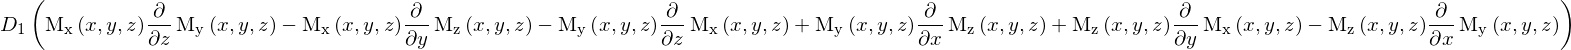

In [8]:
T = D1 * (LI(x, y, z) + LI(y, z, x) + LI(z, x, y))
T

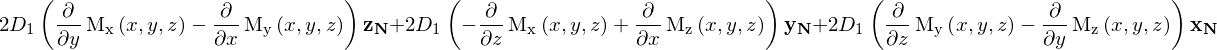

In [9]:
F_T = VarDeriv(T)
F_T

/Users/ryan/.anaconda3/envs/fidimag/lib/python3.6/site-packages/sympy/core/decorators.py:38: SymPyDeprecationWarning: 

_as_finite_diff has been deprecated since SymPy 1.1. Use
Derivative.as_finite_difference instead. See
https://github.com/sympy/sympy/issues/11410 for more info.

  _warn_deprecation(wrapped, 3)


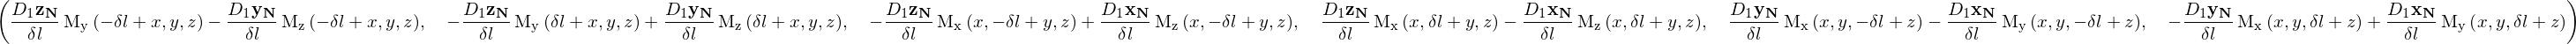

In [10]:
xm, xp, ym, yp, zm, zp = discretised_form(F_T)
xm , xp, ym, yp, zm, zp

# Crystal Class C_nv

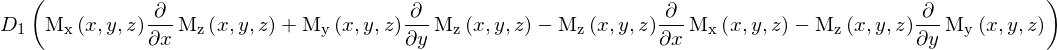

In [11]:
C_nv = D1 * (LI(y, z, y) + LI(x, z, x))
C_nv

In [ ]:
F_C_nv = VarDeriv(C_nv)
F_C_nv

In [ ]:
xm,xp,ym,yp,zm,zp = discretised_form(F_C_nv)
xm , xp, ym, yp, zm, zp

# Crystal Class D_2d

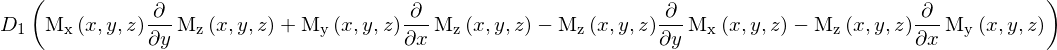

In [12]:
D_2d = D1 * (LI(y, z, x) + LI(x, z, y))
D_2d

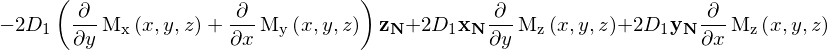

In [13]:
F_D_2d = VarDeriv(D_2d)
F_D_2d

/Users/ryan/.anaconda3/envs/fidimag/lib/python3.6/site-packages/sympy/core/decorators.py:38: SymPyDeprecationWarning: 

_as_finite_diff has been deprecated since SymPy 1.1. Use
Derivative.as_finite_difference instead. See
https://github.com/sympy/sympy/issues/11410 for more info.

  _warn_deprecation(wrapped, 3)


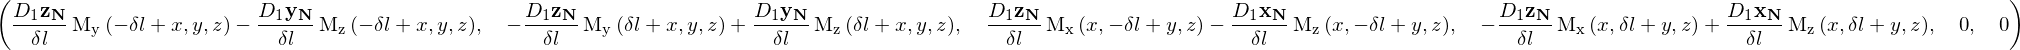

In [14]:
xm, xp, ym, yp, zm, zp = discretised_form(F_D_2d)
xm , xp, ym, yp, zm, zp

# D_n

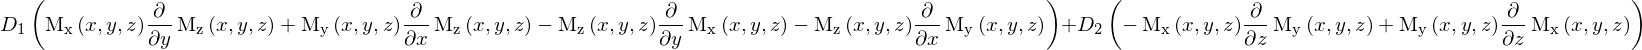

In [18]:
D_n = D1 * (LI(y, z, x) + LI(x, z, y)) + D2 * LI(y, x, z)
D_n

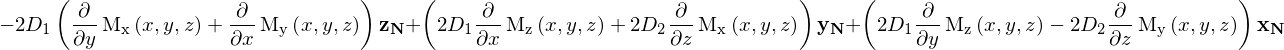

In [19]:
F_D_n = VarDeriv(D_n)
F_D_n

/Users/ryan/.anaconda3/envs/fidimag/lib/python3.6/site-packages/sympy/core/decorators.py:38: SymPyDeprecationWarning: 

_as_finite_diff has been deprecated since SymPy 1.1. Use
Derivative.as_finite_difference instead. See
https://github.com/sympy/sympy/issues/11410 for more info.

  _warn_deprecation(wrapped, 3)


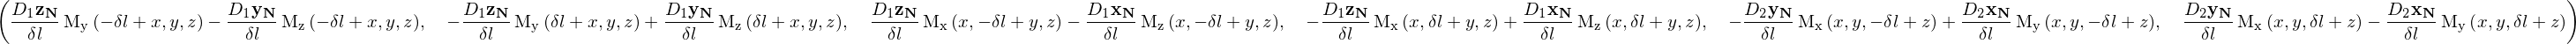

In [21]:
xm, xp, ym, yp, zm, zp = discretised_form(F_D_n)
xm , xp, ym, yp, zm, zp

# C_n

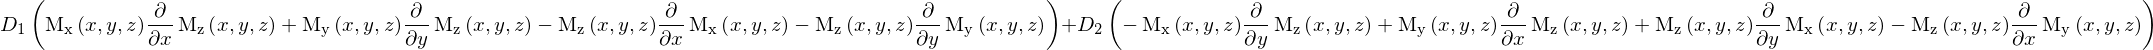

In [22]:
C_n = D1 * (LI(y, z, y) + LI(x, z, x)) + D2 * (LI(y, z, x) - LI(x, z, y))
C_n

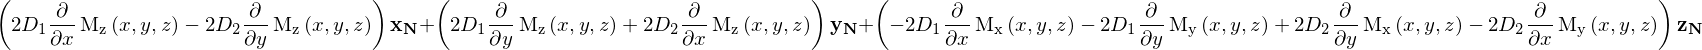

In [24]:
F_C_n = VarDeriv(C_n)
F_C_n

/Users/ryan/.anaconda3/envs/fidimag/lib/python3.6/site-packages/sympy/core/decorators.py:38: SymPyDeprecationWarning: 

_as_finite_diff has been deprecated since SymPy 1.1. Use
Derivative.as_finite_difference instead. See
https://github.com/sympy/sympy/issues/11410 for more info.

  _warn_deprecation(wrapped, 3)


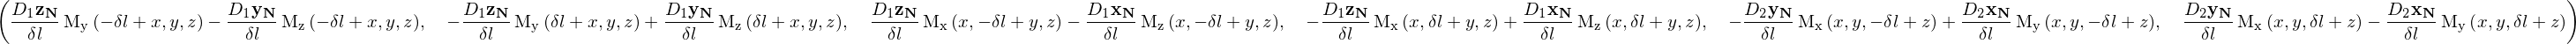

In [25]:
xm, xp, ym, yp, zm, zp = discretised_form(F_D_n)
xm , xp, ym, yp, zm, zp